In [2]:
import pandas as pd

In [21]:
bm_data = pd.read_csv('gist-baemin.csv')
bm_data

,Unnamed: 0,storeNo,name,lat,lng,address
0,0,13655029,바른국밥 첨단점,35.211722,126.837374,광주광역시 광산구 첨단내촌로 56 1층(월계동)
1,1,13701546,록시드갸토 첨단아크레타점,35.214249,126.846429,"광주광역시 광산구 임방울대로800번길 71 아크레타 첨단1층 105,106호(월계동)"
2,2,10646557,크리스피크림도넛 광주첨단점,35.217221,126.842457,"광주광역시 광산구 월계동 867-1 1층 113,114(일부)호 (월계동, 첨단센츄..."
3,3,13414085,인끼밥상,35.218221,126.845623,"광주광역시 광산구 쌍암동 669-4 (쌍암동,105.106호(1층))"
4,4,13911414,챙길 밥 첨단신도시점,35.210916,126.837069,광주광역시 광산구 첨단내촌로 45-4 1층(월계동)
...,...,...,...,...,...,...
2041,2041,13203939,쏘핫 마라탕&마라샹궈,35.206500,126.859484,광주광역시 북구 첨단연신로91번길 44 대성빌딩 1층 108호(신용동)
2042,2042,13447691,까로치아 첨단점,35.211305,126.838069,광주광역시 광산구 월계동 835-4 1층(월계동)
2043,2043,13885594,하이덮밥,35.203890,126.870372,"광주광역시 북구 양산제로 109-7 , 1층(연제동)"
2044,2044,13203939,쏘핫 마라탕&마라샹궈,35.206500,126.859484,광주광역시 북구 첨단연신로91번길 44 대성빌딩 1층 108호(신용동)


In [4]:
bm_data_latlng = bm_data[['lat','lng']]

In [5]:
bm_data_latlng

,lat,lng
0,35.211722,126.837374
1,35.214249,126.846429
2,35.217221,126.842457
3,35.218221,126.845623
4,35.210916,126.837069
...,...,...
2041,35.206500,126.859484
2042,35.211305,126.838069
2043,35.203890,126.870372
2044,35.206500,126.859484


In [6]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

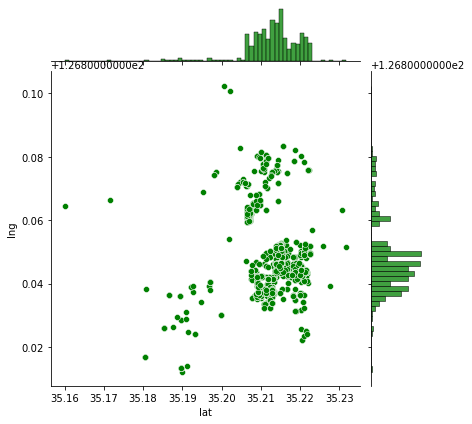

In [7]:
sns.jointplot(x=bm_data_latlng['lat'],y=bm_data_latlng['lng'],color='green',kind='scatter')

In [8]:
from sklearn.cluster import KMeans

In [9]:
ks = range(1,500)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(bm_data_latlng)
    inertias.append(model.inertia_)
    if k%10 == 0:
        print(str(k/10)+"% complete")


1.0% complete
2.0% complete
3.0% complete
4.0% complete
5.0% complete
6.0% complete
7.0% complete
8.0% complete
9.0% complete
10.0% complete
11.0% complete
12.0% complete
13.0% complete
14.0% complete
15.0% complete
16.0% complete
17.0% complete
18.0% complete
19.0% complete
20.0% complete
21.0% complete
22.0% complete
23.0% complete
24.0% complete
25.0% complete
26.0% complete
27.0% complete
28.0% complete
29.0% complete
30.0% complete
31.0% complete
32.0% complete
33.0% complete
34.0% complete
35.0% complete
36.0% complete
37.0% complete
38.0% complete
39.0% complete
40.0% complete
41.0% complete
42.0% complete
43.0% complete
44.0% complete
45.0% complete
46.0% complete
47.0% complete
48.0% complete
49.0% complete


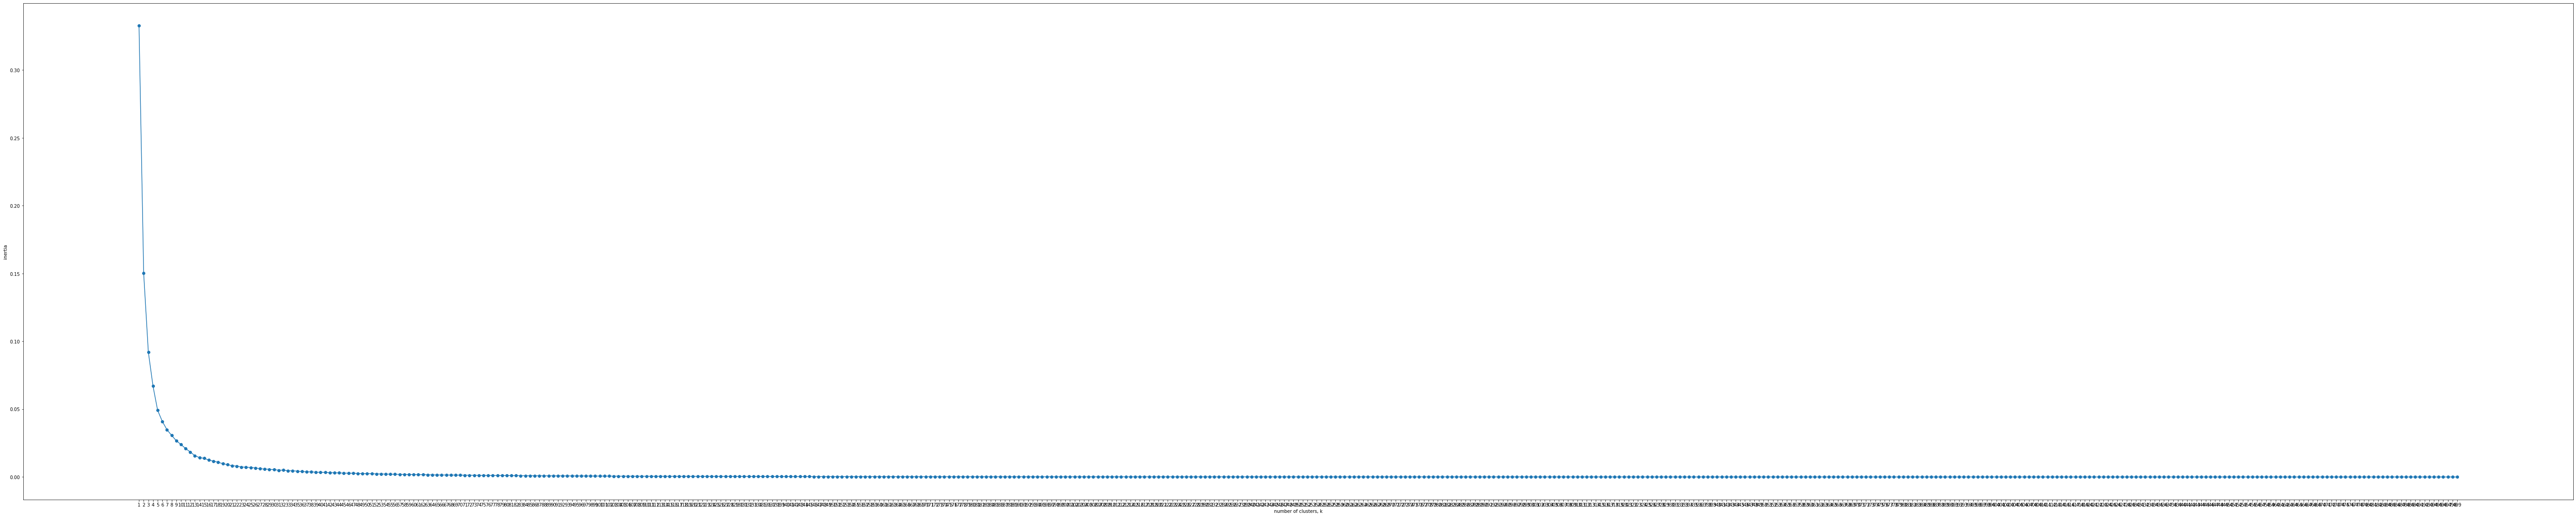

In [10]:
# Plot ks vs inertias
plt.figure(figsize=(100, 20))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [11]:
# K-means 모델과 군집 예측값을 생성

# 클러스터 모델 생성, 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters=35)

clust_model.fit(bm_data_latlng)

centers = clust_model.cluster_centers_
pred =  clust_model.predict(bm_data_latlng)

print(pd.DataFrame(centers))
print(pred[:15])

            0           1
0   35.212616  126.842246
1   35.208391  126.864639
2   35.219626  126.841940
3   35.216086  126.849209
4   35.199945  126.829959
5   35.213612  126.875127
6   35.212114  126.834243
7   35.221488  126.852125
8   35.189908  126.813245
9   35.206824  126.860538
10  35.165769  126.865428
11  35.188517  126.826800
12  35.212769  126.838149
13  35.189229  126.837294
14  35.214737  126.845797
15  35.201446  126.901563
16  35.221239  126.877173
17  35.219560  126.834571
18  35.220808  126.843780
19  35.209342  126.839185
20  35.213352  126.848838
21  35.205345  126.871520
22  35.210291  126.868817
23  35.221137  126.824118
24  35.210071  126.837047
25  35.210784  126.878973
26  35.221876  126.849531
27  35.214867  126.851511
28  35.216433  126.843012
29  35.197753  126.873674
30  35.209088  126.845086
31  35.209218  126.841672
32  35.196840  126.839468
33  35.219105  126.845153
34  35.180530  126.816932
[12 14 28 33 24 33 33  0 18 30 24  9 14 33  3]


In [12]:
clust_df = bm_data_latlng.copy()
clust_df['clust'] = pred
clust_df

,lat,lng,clust
0,35.211722,126.837374,12
1,35.214249,126.846429,14
2,35.217221,126.842457,28
3,35.218221,126.845623,33
4,35.210916,126.837069,24
...,...,...,...
2041,35.206500,126.859484,9
2042,35.211305,126.838069,12
2043,35.203890,126.870372,21
2044,35.206500,126.859484,9


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [14]:
standard_scaler = StandardScaler()
scaled_df = pd.DataFrame(standard_scaler.fit_transform(clust_df.iloc[:,0:4]), columns=clust_df.iloc[:,0:4].columns)

In [15]:
clust_model.fit(scaled_df)

centers_s = clust_model.cluster_centers_
pred_s = clust_model.predict(scaled_df)

In [16]:
clust_df['clust_s'] = pred_s
clust_df

,lat,lng,clust,clust_s
0,35.211722,126.837374,12,32
1,35.214249,126.846429,14,9
2,35.217221,126.842457,28,26
3,35.218221,126.845623,33,13
4,35.210916,126.837069,24,24
...,...,...,...,...
2041,35.206500,126.859484,9,1
2042,35.211305,126.838069,12,32
2043,35.203890,126.870372,21,8
2044,35.206500,126.859484,9,1


In [20]:
cluster_mean = clust_df.groupby('clust').mean()
cluster_mean.to_csv('clustered.csv',mode='w',index=False)
len(cluster_mean)

35

In [18]:
clust_df.sort_values('clust')
clust_count = [0]*35

for i in range(len(clust_df)):
    clust_num = clust_df.iloc[i]['clust']
#     clust_count[clust_num-1] = clust_count[clust_num-1] + 1

ccdf = pd.DataFrame(clust_count)
ccdf.to_csv('clusterCount.csv',mode='w',index=False)

In [19]:
ccdf

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
